<div style="width: 80%;">

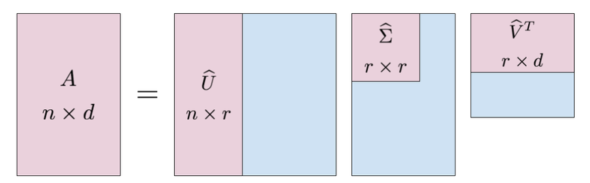
<div style="clear: both"></div>
<br>

<div style="font-size: 20pt; float: left;">Anwendungen der linearen Algebra</div>
<div style="font-size: 20pt; text-align: right;">FS 2023</div>
<div style="font-size: 15pt; margin-top: 10px;">Fachexperten: Roger Burkhardt, Cédric Huwyler</div>
</div>
<br>


# Mini-Challenge 4 zum Thema *Singulärwertzerlegung*

In dieser Mini-Challenge lernst du die Singulärwertzerlegung am Beispiel der Bildkompression besser kennen. Für die Bildkompression gibt es zwar wesentlich performantere Algorithmen (z.B. JPEG), aber an diesem Beispiel können wir gut untersuchen, was die Rolle der einzelnen Singulärwerte ist. Die SVD ist ein sehr mächtiges Tool der linearen Algebra und besitzt sehr viele Anwendungen, die hier nicht abgedeckt sind (Pseudoinverse, Berechnung Konditionszahl, Lösung von Gleichungssystemen, Recommender-Systeme, Principal Component Analysis etc.)

Der Umfang dieser Mini-Challenge ist bewusst sehr kurz gewählt, da sie in der letzten Woche besprochen wird. Wir hoffen du bist damit umso mehr motiviert, die Mini-Challenge umzusetzen und mit SVD deine eigenen Bilder zu komprimieren. Voraussetzung ist, dass du den entsprechenden Stoff zu SVD im Skript gelesen hast.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

## Aufgabe 1: Dimensionsreduktion am Beispiel der Bildkompression

In dieser Aufgabe untersuchen wir, wie Bildkompression mit einer Dimensionsreduktion zusammenhängt. Konkret möchten wir hier eine Variante der SVD, die sogenannte **Truncated SVD** dazu benutzen, um Bilder verlustbehaftet zu komprimieren.

### a) Bild einlesen

Lies eines der beigelegten Bilder in eine Matrix $A$ ein und stelle es graphisch dar.

**Hinweise:**
* Das verwendete Bild muss zwingend schwarz-weiss sein, da sonst für jeden Farbkanal eine Matrix vorliegt (Tensor). Falls du ein eigenes Bild einlesen möchtest, musst du es manuell in einem Grafikprogramm auf den Modus schwarz-weiss setzen und als JPEG speichern (PNG scheint damit nicht klarzukommen).
* Benutze eine geeignete Funktion zum Einlesen. Matplotlib hat zum Beispiel die `imread()`-Funktion.
* Benutze die `imshow()`-Funktion aus Matplotlib zum Darstellen des Bildes und wähle die Colormap "gray".

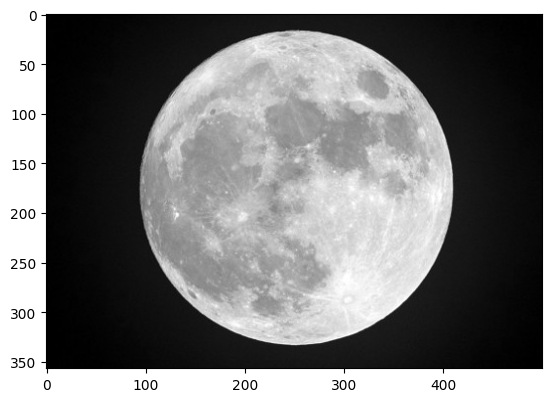

In [15]:
# Bild einlesen
pic = plt.imread("mc4_moon.jpg")
# Bild anzeigen
plt.imshow(pic, cmap="gray")


### b) Singulärwertzerlegung berechnen

Berechne nun die Singulärwertzerlegung der Matrix $A$ mit `np.linalg.svd()`. Was sind die Dimensionen der Matrizen $U$, $\Sigma$ und $V$? Rekonstruiere die Originalmatrix $A$ aus $U$, $\Sigma$ und $V$ und stelle mit einem `assert`-Statement sicher, dass du wieder die gleiche Matrix erhältst.

In [16]:
# Singulärwertzerlegung berechnen
U, S, V = np.linalg.svd(pic)

# Diagonalmatrix aus Singulärwerten erstellen
S_ = np.zeros(pic.shape)
np.fill_diagonal(S_, S)
# Dimensionen der Matrizen
print("Dimensionen von U: ", U.shape)
print("Dimensionen von S: ", S_.shape)
print("Dimensionen von V: ", V.shape)
# Rekonstruktion von A
A = U @ S_ @ V

# Test, ob die Rekonstruktion funktioniert hat
assert np.allclose(pic, A)


Dimensionen von U:  (357, 357)
Dimensionen von S:  (357, 500)
Dimensionen von V:  (500, 500)


### d) Truncated SVD

Laut Definition der Singulärwertzerlegung sind die Singulärwerte in $\Sigma$ absteigend nach ihrer Grösse sortiert. Im Skript zu LE5 wird angesprochen, dass die ersten paar Singulärwerte meistens schon einen grossen Teil der Varianz in den Daten (bzw. hier im Bild) erklären, d.h. dass die ersten paar Singulärwerte meistens sehr viel grösser sind als der Rest und ihre Grösse sehr schnell abfällt.

So kann es für eine Komprimierungsanwendung Sinn machen, nur die ersten $k$ Singulärwerte zu berücksichtigen und den Rest der Singulärwerte in $\Sigma$ auf Null zu setzen und als Rauschen in der Feinstruktur zu betrachten. Damit sind nur noch die ersten $k$ Spalten von $U$ und $V$ relevant für die Rekonstruktion der ursprünglichen Matrix, den Speicherplatz für den Rest können wir uns sparen:

$$
A \approx A_k = U\text{[:,k]} \; \Sigma\text{[:k,:k]} \; V^T\text{[:k,:]},
$$

wobei die Slice-Notation von Numpy benutzt wurde.
Im Vergleich zur ursprünglichen Matrix $A \in \mathbb{R}^{m\times n}$, die $m\cdot n$ Elemente enthält, brauchen wir nun nur noch $m\cdot k + k + n\cdot k = k (1 + m + n)$ Elemente zur Repräsentation von $A$. Für ein $1000\times1000$-Pixel-Bild und $k=20$ entspricht das einer Reduktion auf 4% des ursprünglichen Speicherplatzes. Natürlich mit entsprechenden Informationsverlusten.

Führe nun folgende Schritte durch:

1. Visualiere den Abfall der Singulärwerte und mache eine grobe Abschätzung, ab welchem $k$ du einigermassen vernünftige Rekonstruktionen des Bildes erwartest.

2. Schreibe eine Funktion `truncated_SVD( A, k )`, die die Rang-$k$-Approximation $A_k$ von $A$ berechnet.

3. Visualisiere $A_k$ für verschiedene Wahlen von $k$ zwischen 1 und 20. Ab welchem $k$ sind die groben Details einigermassen gut zu erkennen? Welchem Kompressionfaktor entspricht das?

In [17]:
# Funktion truncated_SVD
def truncated_SVD(A, k):
    # Führe die Singulärwertzerlegung durch
    U, S, VT = svd(A)

    # Schneide die Matrizen entsprechend k zu
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    VT_k = VT[:k, :]

    # Rekonstruiere die Matrix mit den abgeschnittenen Matrizen
    A_k = np.dot(U_k, np.dot(S_k, VT_k))
    return A_k

(0.0, 20.0)

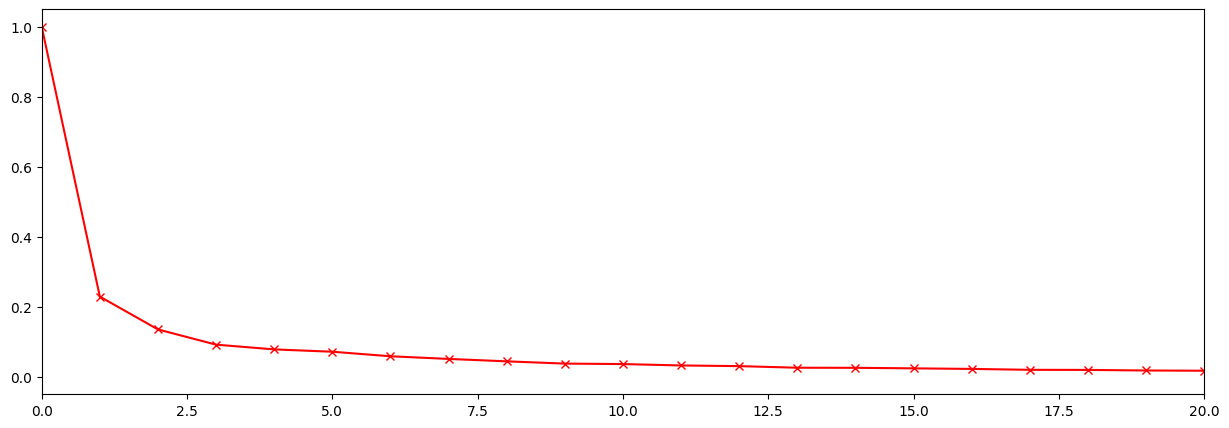

In [18]:
# Singulärwerte plotten
plt.figure(figsize=(15, 5))
plt.plot(S/np.max(S), marker="x", c="red")
plt.xlim(0, 20)

In [19]:
# Rang der Matrix bestimmen
np.linalg.matrix_rank(A_k)

20

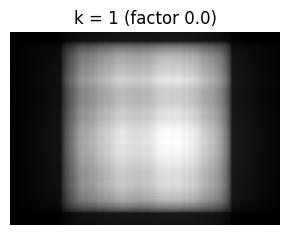

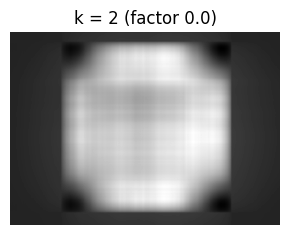

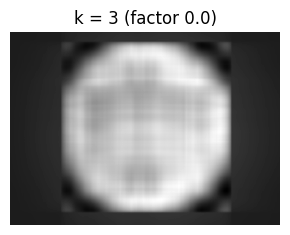

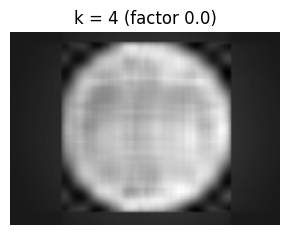

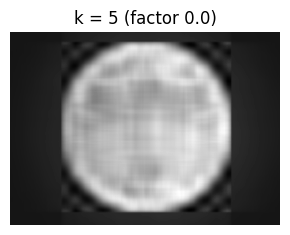

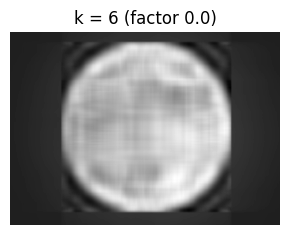

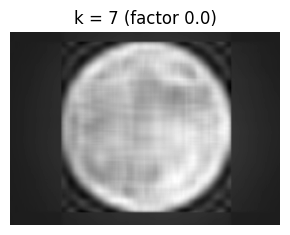

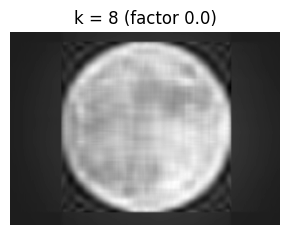

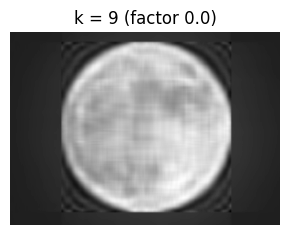

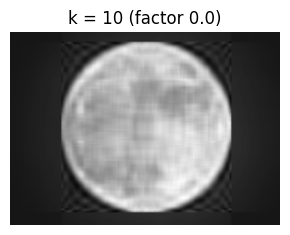

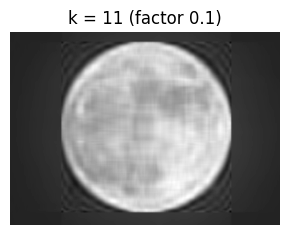

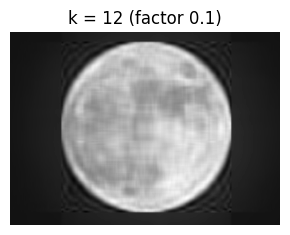

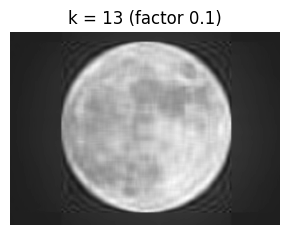

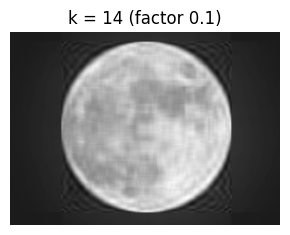

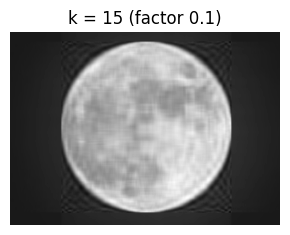

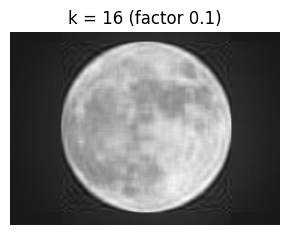

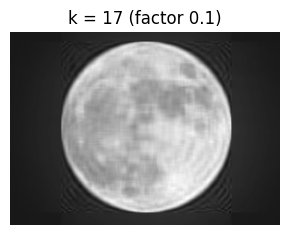

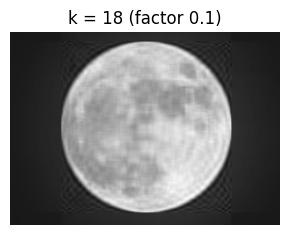

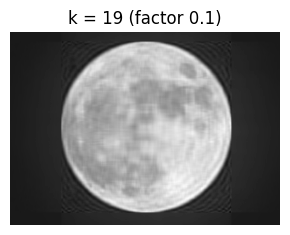

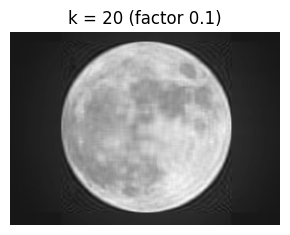

In [34]:
# Liste der k-Werte definieren
k_values = list(range(1, 21))

for k in k_values:
    # Berechnen von A_k
    A_k = truncated_SVD(pic, k)

    # Kompressionsfaktor berechnen
    compression_factor = (k * (1 + pic.shape[0] + pic.shape[1])) / (pic.shape[0] * pic.shape[1])

    # Grafik erstellen
    plt.figure(figsize=(3, 3))
    plt.imshow(A_k, cmap="gray")
    # plt.title("k = " + str(k) + ", Kompressionsfaktor = " + str(compression_factor))
    plt.axis("off")
    plt.title("k = {} (factor {:.1f})".format(k, compression_factor))
    plt.tight_layout()
    # plt.show()

### e) Rekonstruktionsfehler als Funktion von $k$

Es ist anzunehmen, dass für zunehmende $k$ die Distanz zwischen Original $A$ und Rekonstruktion $A_k$ immer kleiner wird. Die Wahl einer geeigneten Distanzmetrik auf durch Matrizen repräsentierten Bildern ist unklar, berechne darum beispielhaft die über die Frobenius-, die Summen- und die Maximumnorm induzierten Distanzmasse $d(A, A_k) = ||A-A_k||$ und stelle diese graphisch als Funktion von $k$ dar.

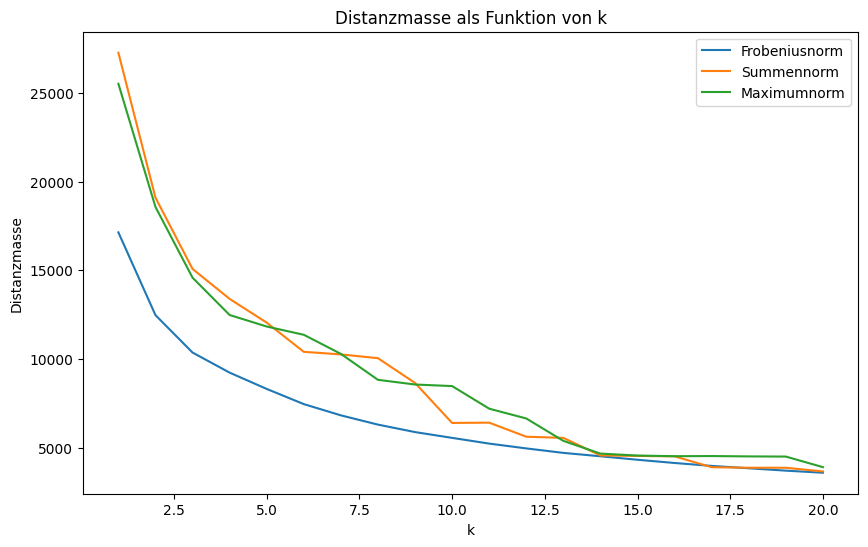

In [35]:
# Distanzmasse berechnen
frobenius_norm = []
one_norm = []
inf_norm = []

# Liste der k-Werte definieren
k_values = list(range(1, 21))

for k in k_values:
    # Berechnen von A_k
    A_k = truncated_SVD(pic, k)

    # Berechnen der Differenzmatrix
    diff = pic - A_k

    # Berechnen der Distanzmasse (Normen und der jeweiligen Liste hinzufügen)
    frobenius_norm.append(np.linalg.norm(diff, ord="fro"))
    one_norm.append(np.linalg.norm(diff, ord=1))
    inf_norm.append(np.linalg.norm(diff, ord=np.inf))


# Grafik erstellen
plt.figure(figsize=(10, 6))

# Normen plotten
plt.plot(k_values, frobenius_norm, label="Frobeniusnorm")
plt.plot(k_values, one_norm, label="Summennorm")
plt.plot(k_values, inf_norm, label="Maximumnorm")

# Achsenbeschriftung
plt.xlabel("k")
plt.ylabel("Distanzmasse")

# Titel und Legende
plt.title("Distanzmasse als Funktion von k")
plt.legend()

# Plot anzeigen
plt.show()


 ### f) Structural Similarity als Ähnlichkeitsmass

Wie oben bereits angetönt, eignen sich die benutzten Distanzmasse nicht gross für den Vergleich von Bildern, da sie nicht die menschliche Wahrnehmung von Ähnlichkeiten zwischen Bildern berücksichtigen. Hierzu gibt es den [Structural Similarity Index](https://en.wikipedia.org/wiki/Structural_similarity), der 1 ist, wenn die beiden Bilder genau gleich sind und sonst kleiner als 1 ist (wie in LE4 kennengelernt). Im Unterschied zu den obigen Massen würden wir erwarten, dass er schon bei eher kleinen Werten von $k$ relativ schnell zu einer hohen Ähnlichkeit schiesst. Prüfe und diskutiere diese Vermutung.

Du kannst hierzu die Implementierung aus `scikit-image` benutzen (das du je nachdem noch installieren musst):

In [36]:
from skimage.metrics import structural_similarity as ssim

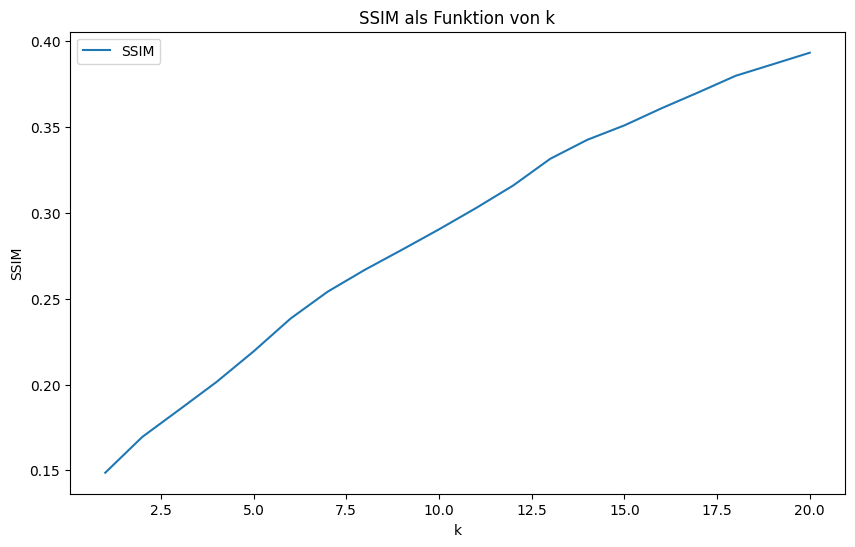

In [37]:
# Liste zur Speicherung der SSIM-Werte
ssim_values = []

for k in k_values:
    # Berechnen von A_k
    A_k = truncated_SVD(pic, k)

    # We assume the image is normalized with values in range [0, 1]
    s = ssim(pic, A_k, multichannel=True, data_range=1)

    ssim_values.append(s)

# Erstellen Sie die Grafik
plt.figure(figsize=(10,6))

# SSIM-Werte plotten
plt.plot(k_values, ssim_values, label='SSIM')

# Achsenbeschriftung
plt.xlabel('k')
plt.ylabel('SSIM')

# Titel und Legende
plt.title('SSIM als Funktion von k')
plt.legend()

# Plot anzeigen
plt.show()


In [38]:
# Sicherstellen, dass der Wert von data_range zu den Daten vom Bild passt
# dazu können die maximale und minimale Intensität des Bildes mit np.max() und np.min() berechnet werden
print("Maximaler Wert des Bildes: ", np.max(pic))
print("Minimaler Wert des Bildes: ", np.min(pic))

Maximaler Wert des Bildes:  255
Minimaler Wert des Bildes:  0
